**PRACTICA ÁRBOLES DE DECISIÓN**

**Nombre:**

**Ciclo:**

**Asignatura:**

Realizar el siguiente ejercicio sobre compras y explicar el modelo de acuerdo a los resultados obtenidos.

In [2]:
import pandas as pd
import numpy as np\

# Crear datos ficticios agregar 1000 registros
num_samples = 1000

# Generar edades aleatorias entre 18 y 70
np.random.seed(0)
edades = np.random.randint(18, 71, num_samples)

# Generar ingresos aleatorios en un rango razonable
ingresos = np.random.randint(20000, 100000, num_samples)

# Definir la función de probabilidad de compra
def probabilidad_compra(edad, ingreso):
    # Simplificación: La probabilidad de compra aumenta con el ingreso y la edad.
    return (ingreso / 100000) * 0.6 + (edad / 70) * 0.4

# Generar datos de compra basados en la probabilidad
compras = [np.random.rand() < probabilidad_compra(edad, ingreso) for edad, ingreso in zip(edades, ingresos)]

# Convertir a 'Sí' o 'No'
compras = ['Sí' if compra else 'No' for compra in compras]

# Crear el DataFrame
data = {
    'Edad': edades,
    'Ingreso': ingresos,
    'Compra': compras
}

df = pd.DataFrame(data)

# Mostrar las primeras filas del DataFrame
df.head()



,Edad,Ingreso,Compra
0,62,59789,Sí
1,65,32912,No
2,18,57285,No
3,21,49764,Sí
4,21,94165,Sí


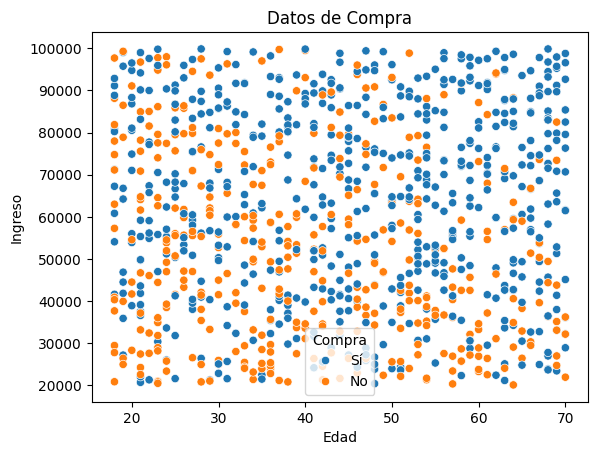

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='Edad', y='Ingreso', hue='Compra', data=df)
plt.title('Datos de Compra')
plt.show()


In [4]:
# Convertir la columna 'Compra' a valores numéricos ('No' -> 0, 'Sí' -> 1)
df['Compra'] = df['Compra'].map({'No': 0, 'Sí': 1})

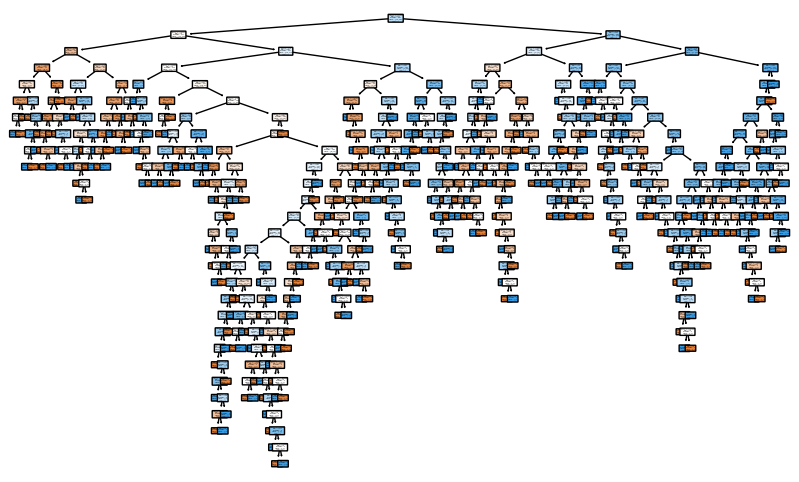

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

# Dividir los datos en características (X) y variable objetivo (y)
X = df[['Edad', 'Ingreso']]
y = df['Compra']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de árbol de decisión
modelo_arbol = DecisionTreeClassifier()

# Entrenar el modelo
modelo_arbol.fit(X_train, y_train)

# Visualizar el árbol
plt.figure(figsize=(10, 6))
tree.plot_tree(modelo_arbol, feature_names=['Edad', 'Ingreso'], class_names=['No', 'Sí'], filled=True, rounded=True)
plt.show()


In [7]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Realizar predicciones con los datos de prueba
y_pred = modelo_arbol.predict(X_test)

# Calcular la precisión del modelo
precision = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {precision:.2f}')

# Generar el informe de clasificación
reporte_clasificacion = classification_report(y_test, y_pred, target_names=['No', 'Sí'])
print('Informe de clasificación:')
print(reporte_clasificacion)

# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)
print('Matriz de confusión:')
print(matriz_confusion)

Precisión del modelo: 0.64
Informe de clasificación:
              precision    recall  f1-score   support

          No       0.57      0.60      0.59        85
          Sí       0.69      0.67      0.68       115

    accuracy                           0.64       200
   macro avg       0.63      0.63      0.63       200
weighted avg       0.64      0.64      0.64       200

Matriz de confusión:
[[51 34]
 [38 77]]


#Conclusion de la aplicacion del modelo
El modelo de árbol de decisión aplicado proporciona una herramienta útil para predecir si una persona realizará una compra basándose en su edad e ingreso.
Aunque los resultados iniciales pueden ser prometedores, es esencial evaluar continuamente el modelo y considerar posibles mejoras para garantizar un rendimiento
robusto y confiable en diferentes escenarios y conjuntos de datos.